In [21]:
import numpy as np


class KBanditEpsilonGreedy:
    
    def __init__(self, k, epsilon, iteration):
        self.k = k
        self.epsilon = epsilon
        self.iteration = iteration
        
        self.mean_reward = 0
        
        self.mean_action_reward = np.zeros(k)
        self.number_action_selection = np.zeros(k)
        
        self.qa = np.random.normal(0, 1, k)
        self.round = 0
        self.iteration_reward = np.zeros(iteration)

        
    def select_action(self):
        selection_index = np.random.rand()
        
        if self.round == 0:
            action = np.random.choice(self.k)
            
        elif self.epsilon > selection_index:   # exploration
            action = np.random.choice(self.k)
        
        else:   # exploit
            action = np.argmax(self.mean_action_reward)
    
        reward = np.random.normal(self.qa[action], 1)
        self.round += 1
        self.mean_reward= self.mean_reward + (reward - self.mean_reward)/self.round
        self.number_action_selection[action] += 1
        self.mean_action_reward[action] = self.mean_action_reward[action] + (reward - self.mean_action_reward[action])/self.number_action_selection[action]
    
    def run_iteration(self):
        for i in range(self.iteration):
            self.select_action()
            self.iteration_reward[i] = self.mean_reward


In [25]:
# test

k = 5
iteration = 500


episodes = 500

epsilon_0_rewards = np.zeros(iteration)
epsilon_0_3_rewards = np.zeros(iteration)
epsilon_0_1_rewards = np.zeros(iteration)


for i in range(episodes):
    epsilon_0 = KBanditEpsilonGreedy(k, 0, iteration)
    epsilon_0_3 = KBanditEpsilonGreedy(k, 0.03, iteration)
    epsilon_0_1 = KBanditEpsilonGreedy(k, 0.1, iteration)
    
    epsilon_0.run_iteration()
    epsilon_0_1.run_iteration()
    epsilon_0_3.run_iteration()

    
    epsilon_0_rewards = epsilon_0_rewards + (epsilon_0.iteration_reward - epsilon_0_rewards) / (i+1)
    epsilon_0_1_rewards = epsilon_0_1_rewards + (epsilon_0_1.iteration_reward - epsilon_0_1_rewards) / (i+1)
    epsilon_0_3_rewards = epsilon_0_3_rewards + (epsilon_0_3.iteration_reward - epsilon_0_3_rewards) / (i+1) 

In [26]:
import matplotlib.pyplot as plt

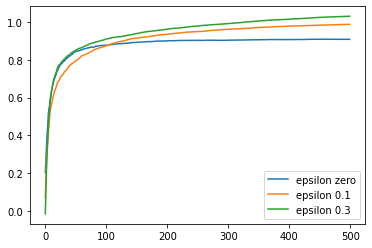

In [27]:
plt.figure()
plt.plot(epsilon_0_rewards, label ="epsilon zero")
plt.plot(epsilon_0_1_rewards, label ="epsilon 0.1")
plt.plot(epsilon_0_3_rewards, label ="epsilon 0.3")
plt.legend()